In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Customer Behavior Analysis

This notebook analyzes customer behavior patterns using unsupervised and supervised learning techniques. We'll go through the following steps:
1. Data loading and exploration
2. Feature analysis and preprocessing
3. Customer segmentation using clustering
4. Predictive modeling for segment classification
5. Spending pattern analysis

## Data Import and Initial Setup
First, we'll import the required libraries and load our dataset:

In [22]:
df = pd.read_csv('customer_behavior_unsupervised.csv')
df

,feature_0,feature_1,feature_2,feature_3,feature_4
0,-1.248325,-1.137174,0.277968,0.702952,1.374166
1,-1.241003,0.720804,0.944749,-1.672147,-0.695038
2,-0.859728,0.955295,0.742522,-1.416056,-0.820891
3,-0.546781,1.198398,0.489929,-1.692133,-0.573161
4,1.091959,0.905112,0.064361,1.088081,-0.892193
...,...,...,...,...,...
495,-1.717106,0.772110,0.117375,-1.134905,-0.795564
496,-0.775524,0.864913,0.670800,-1.384047,-0.524277
497,-1.168657,0.963444,0.422672,-1.461787,-0.579008
498,-0.264773,-1.262000,1.305169,0.567142,1.698487


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_0,500.0,-2.344791e-16,1.001002,-2.268404,-0.700023,-0.122542,0.663055,2.161047
feature_1,500.0,-1.314504e-16,1.001002,-1.582220,-0.927804,0.131870,0.965398,1.260191
feature_2,500.0,5.684342e-16,1.001002,-2.404161,-0.718573,0.273449,0.773960,1.783935
feature_3,500.0,-1.882938e-16,1.001002,-2.370457,-0.883622,0.291895,0.817384,1.947826
feature_4,500.0,-2.877698e-16,1.001002,-1.269599,-0.724162,-0.409740,0.627749,2.191764


## Exploratory Data Analysis (EDA)

Let's examine our dataset's basic statistics and check for any missing values. This will help us understand our data's characteristics and quality.

In [24]:
df.isna().sum()

feature_0    0
feature_1    0
feature_2    0
feature_3    0
feature_4    0
dtype: int64

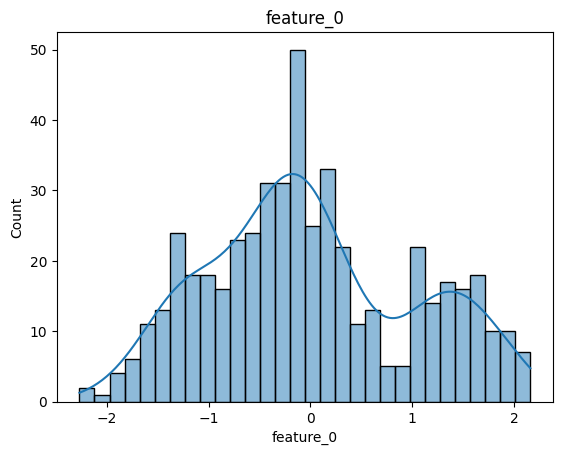

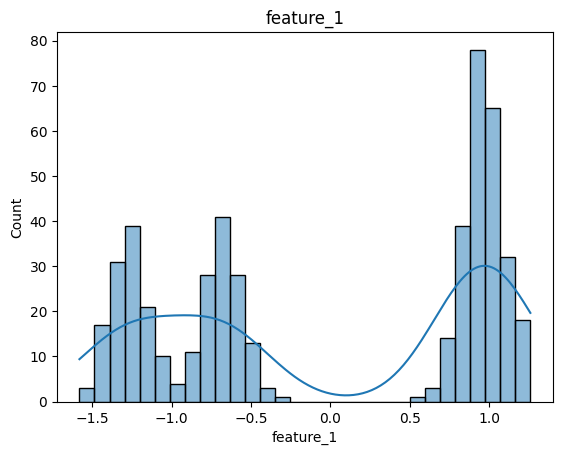

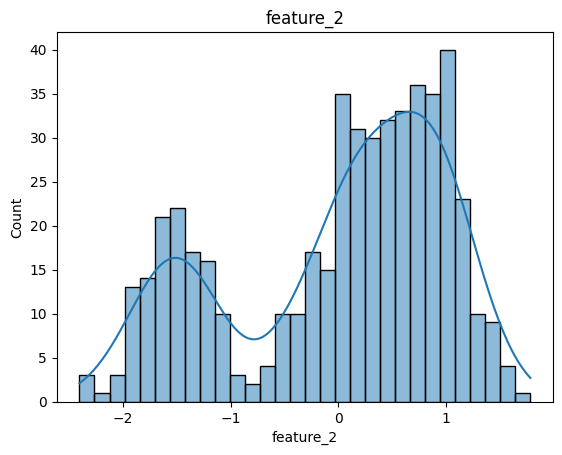

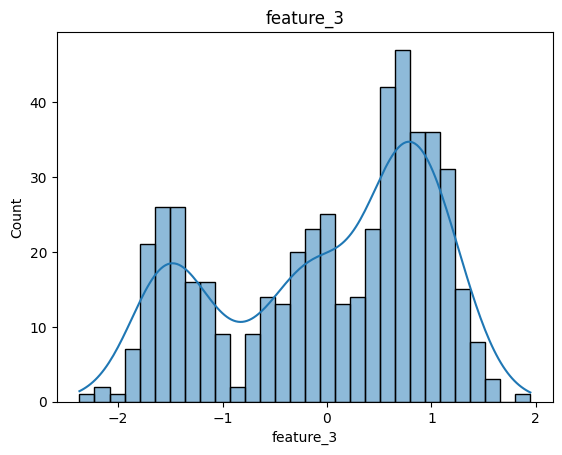

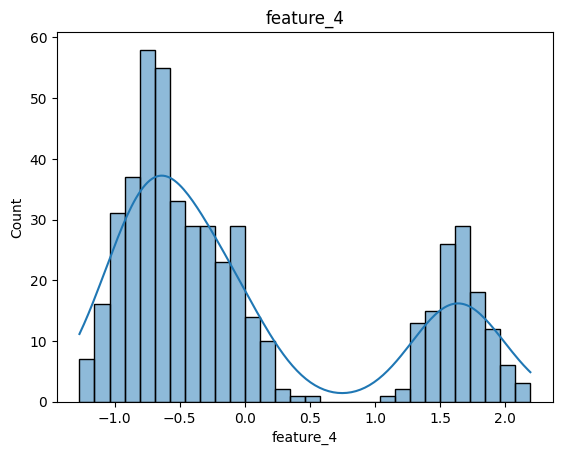

In [25]:
for col in df.columns:
    plt.figure()
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
    plt.show()

## Data Distribution Analysis

We'll visualize the distribution of each feature using histograms. This helps us understand:
- The shape of our data
- Potential outliers
- Any patterns or skewness in the features

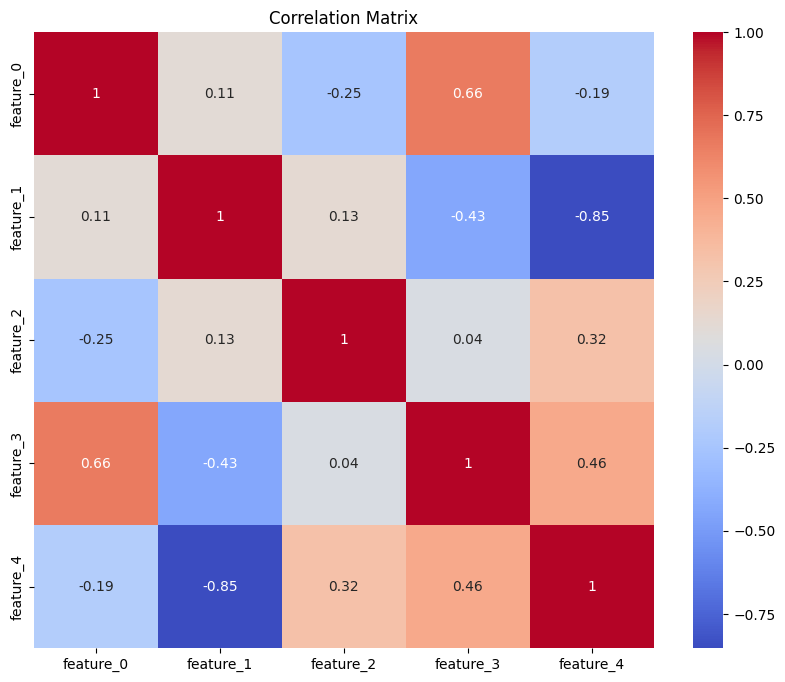

In [26]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Feature Correlation Analysis

We'll create a correlation matrix heatmap to understand:
- Relationships between different features
- Potential redundant information
- Key feature interactions

This helps us identify which features might be most important for our analysis.

In [27]:
from sklearn.preprocessing import MinMaxScaler
sclaer = MinMaxScaler()

X = sclaer.fit_transform(df)

## Data Preprocessing

Before clustering, we need to normalize our features to ensure they're on the same scale. This is crucial because:
- Features might have different units
- K-means clustering is sensitive to scale
- Normalization ensures fair comparison between features

We'll use MinMaxScaler to scale all features between 0 and 1.

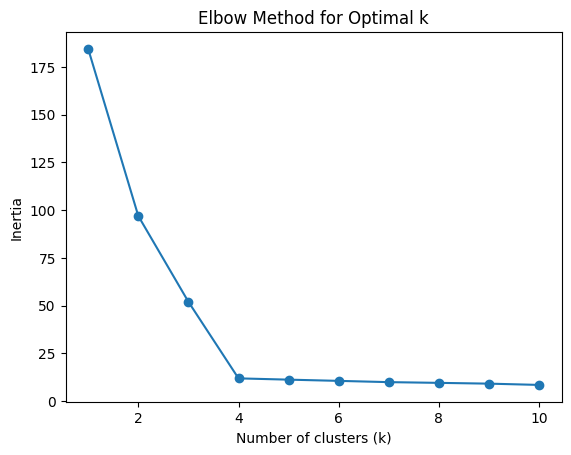

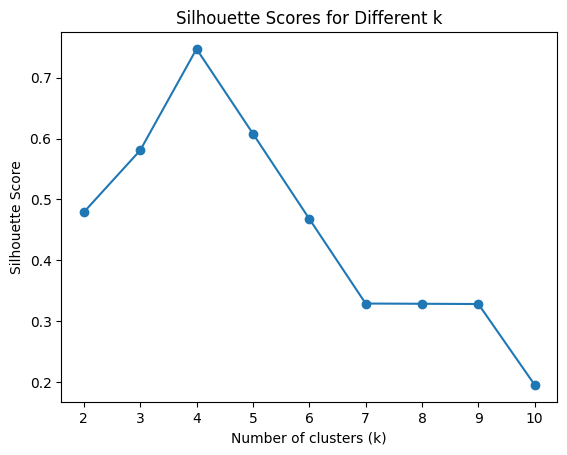

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
ks = range(1, 11)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)                 
    else:
        silhouette_scores.append(np.nan)    

# Plotting the Elbow Method
plt.plot(ks, inertia, marker='o')
plt.xlabel('Number of clusters (k)')    
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plotting Silhouette Scores
plt.plot(ks, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

## Customer Segmentation using K-means Clustering

We'll use K-means clustering to segment our customers into distinct groups. To find the optimal number of clusters:

1. We'll use the Elbow Method to analyze the relationship between:
   - Number of clusters (k)
   - Inertia (within-cluster sum of squares)

2. We'll also use Silhouette Analysis to:
   - Measure how similar objects are to their own cluster compared to other clusters
   - Higher silhouette scores indicate better-defined clusters

In [29]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

df['cluster'] = kmeans_labels
df['cluster'].value_counts().sort_index()

cluster
0    125
1    125
2    125
3    125
Name: count, dtype: int64

## Visualizing Customer Segments

To better understand our customer segments, we'll:
1. Use PCA (Principal Component Analysis) to reduce our data to 2 dimensions
2. Create a scatter plot showing the different clusters
3. Analyze how well separated our clusters are
4. Check how much variance is explained by our PCA components

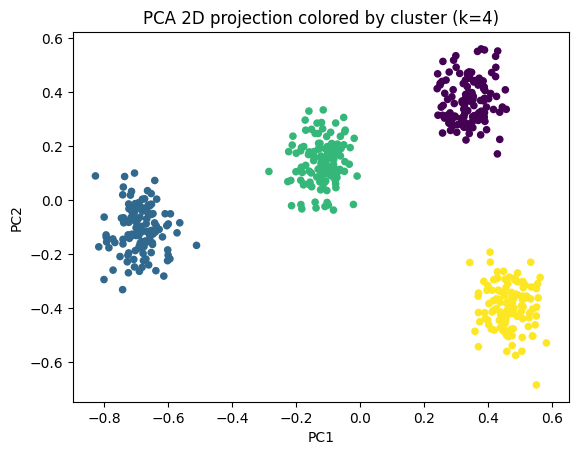

Explained variance ratio by PCA components: [0.56223214 0.23796022]


In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, s=20)
plt.title(f'PCA 2D projection colored by cluster (k={4})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

print("Explained variance ratio by PCA components:", pca.explained_variance_ratio_)

In [31]:
X = df.drop("cluster", axis=1)
y = df["cluster"]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[25  0  0  0]
 [ 0 25  0  0]
 [ 0  0 25  0]
 [ 0  0  0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        25

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Accuracy: 1.0


## Building a Predictive Model

Now that we have our customer segments, we'll build a Random Forest Classifier to:
1. Predict which segment a new customer belongs to
2. Evaluate the model's performance using:
   - Confusion matrix
   - Classification report (precision, recall, F1-score)
   - Overall accuracy

This will help us automatically classify new customers into the right segment.

In [34]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
clf = RandomForestClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=cv, scoring="accuracy")

print("Cross-validation accuracies:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation accuracies: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0


## Model Validation

We'll use cross-validation to ensure our model is robust:
- Split the data into 5 folds
- Train and test the model on different combinations
- Calculate average performance metrics
- Check consistency of results across folds

This helps ensure our model will perform well on new, unseen data.

In [35]:
def predict_cluster(new_user_features):
    scaled = sclaer.transform([new_user_features])
    return rf.predict(scaled)[0]

## Prediction Function

Creating a utility function to:
- Take new customer features as input
- Scale the features using our trained sclaer
- Predict which segment the customer belongs to
- Return the predicted cluster number

This function can be used to classify new customers in real-time.

In [36]:
example_user = X.iloc[0].values
predicted_cluster = predict_cluster(example_user)
predicted_cluster

c:\Users\gewei\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\gewei\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


np.int32(0)

In [37]:
np.random.seed(42)

df["spending"] = (
    abs(50 * df["feature_0"] + 30 * df["feature_2"] - 20 * df["feature_4"] + np.random.normal(0, 10, size=len(df))))

df

,feature_0,feature_1,feature_2,feature_3,feature_4,cluster,spending
0,-1.248325,-1.137174,0.277968,0.702952,1.374166,1,76.593383
1,-1.241003,0.720804,0.944749,-1.672147,-0.695038,3,21.189560
2,-0.859728,0.955295,0.742522,-1.416056,-0.820891,3,2.183977
3,-0.546781,1.198398,0.489929,-1.692133,-0.573161,3,14.052299
4,1.091959,0.905112,0.064361,1.088081,-0.892193,0,72.031102
...,...,...,...,...,...,...,...
495,-1.717106,0.772110,0.117375,-1.134905,-0.795564,3,61.033684
496,-0.775524,0.864913,0.670800,-1.384047,-0.524277,3,18.539133
497,-1.168657,0.963444,0.422672,-1.461787,-0.579008,3,36.075943
498,-0.264773,-1.262000,1.305169,0.567142,1.698487,1,16.809494


## Spending Pattern Analysis

We'll create a synthetic spending variable based on customer features to:
1. Demonstrate relationships between customer behavior and spending
2. Create a model that predicts potential customer spending
3. Understand which features most influence spending patterns

Note: This is a simulated spending pattern for demonstration purposes.

In [38]:
X = df.drop("spending", axis=1)
y = df["spending"]

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.09906107264547093
R^2 Score: 0.9207511418836233
